In [1]:
import logging
import tensorflow as tf

from src.common.logs import setup_logging
from src.models_service.models_service import TensorflowModelTuningService as TFMTS
from env import Env


logger = setup_logging(logger_name=__name__,
                        console_level=logging.INFO, 
                        log_file_level=logging.INFO)

config = {
    'AV': {
        'key': '',
        'ticker': 'VGT',
        'outputsize': 'full',
        'key_adjusted_close': 'Adj Close',
        'key_volume': 'Volume',
    },
    'data': {
        'test_size': 0.05,
    }, 
    'model': {
        'name': 'LSTM', 
        'window': [20, 40, 120],
        'shuffle_buffer_size' : [1], # In % from dataset len. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
        'batch_size' : [32, 64, 128],
        'epochs' : [500],
# ----------------------------------
        'optimizer': 'adam',
        'loss': 'huber_loss',
        'metrics': ['mae', 'mse'],
    },
    'plots': {
        'loss_zoom': 0.9,
        'show': False,
    },
}

2023-10-22 03:16:58.869607: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 03:16:58.869674: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 03:16:58.869707: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 03:16:58.878941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Grig Search

* When we traine model it is trained on yesturdays (close-1) data to predict todays close.  
In reality we use training data which is  some time in the past. But the idea is the same:   

<center><b> We use (-1t) features to train (0t) Closing Price. </b></center>

* Then we predict Todays close price using yesturdays data.  
* This means on the chart which we see and use in files PREDICT_LSTM_NFeatures.ipynb and _TRAIN_LSTM_NFeatures.ipynb and saved pictures we use yesturday's data to predict todays close price and plotting todays close price and prediction.   
<center><b>  BUT FEATURES FROM TODAY ARE NOT USED IN PREDICTION </b></center>

* So we can use today's closing data to predict tomorrows close price. That is what we do int app.py. We don't shift data since we don;t need to train model. We just data as is meaning today's input predicts tomorrows close price - (t0) predicts (t1).

2023-10-22 03:17:02.308159: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-22 03:17:02.315481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-22 03:17:02.315574: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-22 03:17:02.317434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-22 03:17:02.317500: I tensorflow/compile

Epoch 1/30


2023-10-22 03:17:17.761911: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-22 03:17:19.484592: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f10980a72c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-22 03:17:19.484650: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-10-22 03:17:19.490461: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-22 03:17:19.587489: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 [==============================] - 9s 16ms/step - loss: 95.5591 - mae: 96.0578 - mse: 20065.7090
Epoch 2/30
74/74 [==============================] - 2s 13ms/step - loss: 72.7166 - mae: 73.2157 - mse: 13761.0605
Epoch 3/30
74/74 [==============================] - 2s 13ms/step - loss: 72.6364 - mae: 73.1351 - mse: 14159.3896
Epoch 4/30
74/74 [==============================] - 2s 15ms/step - loss: 72.6253 - mae: 73.1241 - mse: 14176.1426
Epoch 5/30
74/74 [==============================] - 2s 13ms/step - loss: 72.5398 - mae: 73.0379 - mse: 14043.6240
Epoch 6/30
74/74 [==============================] - 2s 13ms/step - loss: 72.6753 - mae: 73.1733 - mse: 14009.3066
Epoch 7/30
74/74 [==============================] - 2s 13ms/step - loss: 72.6534 - mae: 73.1523 - mse: 13976.8906
Epoch 8/30
74/74 [==============================] - 2s 14ms/step - loss: 72.0527 - mae: 72.5505 - mse: 14112.6621
Epoch 9/30
74/74 [==============================] - 2s 18ms/step - loss: 41.3209 - mae: 41.8160 - m

2023-10-22 03:18:11 - src.common.plots - INFO - Plot "Loss-VGT_LSTM_W20_SBS1_B64_E30_P42113_2023_10_22__03_17.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_W20_SBS1_B64_E30_P42113_2023_10_22__03_17.png"
2023-10-22 03:18:11 - __main__ - INFO - Model saved as VGT_LSTM_W20_SBS1_B64_E30_P42113_2023_10_22__03_17.keras
2023-10-22 03:18:11 - __main__ - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_W20_SBS1_B64_E30_P42113_2023_10_22__03_17_scalers.pkl"
2023-10-22 03:18:11 - src.models_service.models_service - INFO - ---------------------------------model_forecast() - X_df shape-------------------------------------
2023-10-22 03:18:11 - src.models_service.models_service - INFO - X_df.shape: (248, 2)
2023-10-22 03:18:11 - src.models_service.models_service - INFO - Last 2 records:
            Adj Close    Volume
Date                           
2023-10-18     426.07  397930.0
2023-10-19     420.23  318303.0
2023-10-22 03:18:11 - src.models_service.mode

229/229 [==============================] - 2s 7ms/step


2023-10-22 03:18:14.748658: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11857811084572215561
2023-10-22 03:18:14 - src.models_service.models_service - INFO - ------------------------model_forecast() - forecast for 2 last ---------------------------
2023-10-22 03:18:14 - src.models_service.models_service - INFO - (Prediction -2 - [419.52756])
2023-10-22 03:18:14 - src.models_service.models_service - INFO - (Prediction -1 - [420.64108])
2023-10-22 03:18:14 - src.models_service.models_service - INFO - Predicted shape: (229, 1)
2023-10-22 03:18:14 - src.models_service.models_service - INFO - ----------------------------------------------------------------------------------------------------
2023-10-22 03:18:14 - __main__ - INFO - results.shape: (229,)
2023-10-22 03:18:14 - __main__ - INFO - results[-3:]: [417.6821  419.52756 420.64108]
2023-10-22 03:18:14 - __main__ - INFO - df_test_y.shape: (248,)
2023-10-22 03:18:14 - __main__ - IN

/workspaces/P7-Trading-Bot/models_trained


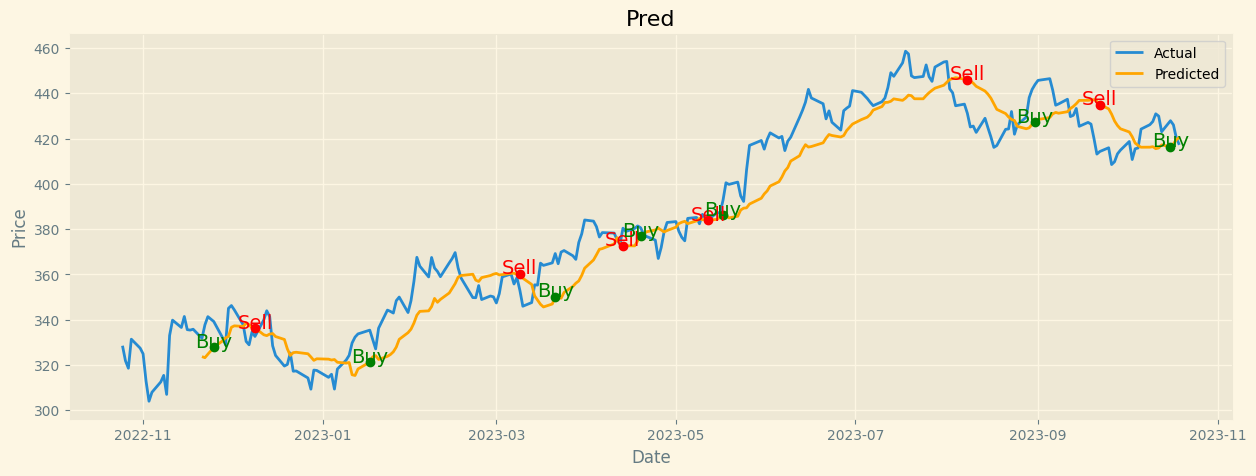

In [2]:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(None, 2)), # where 2 is the number of features
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
        ]
    )

# model.save_weights(f'{Env.PROJECT_ROOT}/models_trained/keep/my_model_weights.h5')
grid_search_service = TFMTS(model, config)
grid_search_service.grid_search(logger, verbose=False)